# Simulazione di Rate di Muoni cosmici

In questa simulazione ci occuperemo di studiare il rate R di un flusso di muoni cosmici che impatta su un sistema di due fotorivelatori di dimensione $ 10 x 20 cm $ in due casi: 
1) Al variare della distanza che li separa D.
2) Al variare dell'efficienza  E dei due.

Supponiamo che ai nostri rivelatori giunga soltanto la parte dura del flusso di raggi cosmici secondari, ovvero i muoni. Questa condizione può essere verificata inserendo un materiale assorbitore prima del primo rivelatore.
I raggi cosmici hanno una distribuzione angolare rispetto alla normale alla superficie della Terra descrivibile
dalla funzione:
$ f(theta) \propto  cos^2(\theta) $

## Librerie da importare

In [8]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.random as rnd

## Generazione iniziale

Generiamo 100000 Muoni che impattano sulla superficie del primo rivelatore con un angolo theta distribuito come sopra, e x, y  e phi (angolo  sul piano del rivelatore) distribuiti in modo uniforme.

In [9]:
Nmuon= 100000

#scriviamo la funzione di distribuzione
def F(t):
     return np.cos(t)*np.cos(t)

#cord() genera le coordinate casuali di un evento

def cord():
    x= rnd.uniform(0, 10)
    y= rnd.uniform(0, 20)
    phi= rnd.uniform(0, 2*np.pi)
      #qui generiamo theta
    ##per generare theta procediamo nel seguente modo (hit or miss), generiamo theta ed f di theta in modo uniforme 
    ##nel loro intervallo di definizione,se ftheta è minore di Ftheta ovvero valore ottenuto da formula con theta 
    ##generato casualmente allora prendiamo theta altrimenti rifacciamo tutto
    theta= rnd.uniform(-np.pi *0.5, np.pi*0.5)
    ftheta= rnd.uniform(0,1)
    while ftheta > F(theta):
        theta= rnd.uniform(-np.pi*0.5, np.pi*0.5)
        ftheta= rnd.uniform(0, 4/np.pi)
    cord = np.array( [x,y, phi, theta] )
    return cord 



#generiamo gli Nmuon incidenti

inc1=np.array([cord() for i in range(Nmuon) ]) 
print(inc1)

[[ 3.02038147  3.28115598  4.82953375 -0.82497435]
 [ 5.31563936  1.49542085  5.70609415  0.96090007]
 [ 2.27047732  1.36913894  4.14196134  0.36898137]
 ...
 [ 8.57550337 12.82101161  0.99259271  0.92778406]
 [ 2.74134593 19.3476524   1.96633999 -0.2721477 ]
 [ 8.65531084  9.67588026  6.23093289 -0.39567752]]


Verifichiamo che le particella siano distribuite correttamente:

<IPython.core.display.Javascript object>


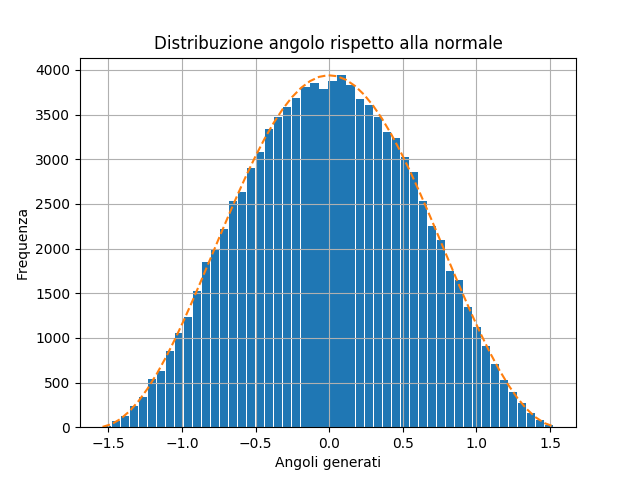

Text(0.5, 1.0, 'Distribuzione angolo rispetto alla normale')

In [10]:
fig0=plt.figure(0)
axis0=fig0.add_subplot(111)
n, bins, patches = axis0.hist(inc1[:,3], bins=50, rwidth=0.9 )
axis0.grid(True)
y=F(bins)*n.max()
axis0.plot(bins, y, '--')
axis0.set_xlabel('Angoli generati')
axis0.set_ylabel('Frequenza')
axis0.set_title('Distribuzione angolo rispetto alla normale')

## Taglio geometrico e di efficienze

A questo punto il nostro obiettivo diventa studiare quante delle particelle rivelate dal primo rivelatore impattano geometricamente sul secondo, e a sua volta nota l'efficienza del secondo, quante di queste vengono contate,al secondo.
Fissiamo i parametri liberi della simulazione (in seguito li modifichiamo):

In [11]:
d=20 #distanza tra i due scintillatori in cm
e1=0.7 #efficienza primo scintillatore
e2=0.7 #efficienza secondo scintillatore

Contiamo i muoni che soddisdino le condizioni di rivelazione:

In [12]:

def rate(d, e1, e2):
    
    #definiamo una funzione che calcoli le coordinate del secondo punto di incidenza
    
    def imp2(arr,d):
        x2=arr[0]+d*np.cos(arr[2])*np.tan(arr[3])
        y2=arr[1]+d*np.sin(arr[2])*np.tan(arr[3])
        return [x2,y2]

    #costruiamo una matrice con le coordinate d'impatto sul secondo rivelatore

    inc2=np.array([imp2(inc1[i,:],d) for i in range(Nmuon)])

    #costruiamo due array con le probabilità di passaggio per ciascun rivelatore

    pass1 = rnd.rand(Nmuon)
    pass2 = rnd.rand(Nmuon)

    #costruiamo una matrice che verifichi che tutte le 3 condizioni per la rivelazione siano soddisfatte
    
    count=np.array([pass1[i]<e1 and pass2[i]<e2 and 0<inc2[i,0]<10 and 0<inc2[i,1]<20 for i in range(Nmuon)])

    seen=count.sum()
    frac=seen/Nmuon
    rate=20/6*frac
    return rate

testrate=rate(d,e1,e2)

print("\n\nI muoni rivelati sono: ", testrate*6/20*Nmuon, "\nLa frazione rivelata è: ", testrate*6/20 )
print("Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: "+"{0:.2f}".format(testrate)+ " Hz")




I muoni rivelati sono:  17639.0 
La frazione rivelata è:  0.17639
Considerando un rate atteso di 1 muone per cm² al minuto il rate rivelato atteso è: 0.59 Hz


## Grafici

A questo punto andiamo a studiare in un grafico come varia il rate in funzione della distanza.

In [13]:
#studiamo prima al variare di D e fissiamo e1 ed e2 #lasciamo come esempio quest'ultimo

D= np.array([0, 5, 10, 15, 25, 50, 75, 100]) #Cm
Rated1 = np.array([rate(dd, e1, e2) for dd in D])
Rated2 = np.array([rate(dd, 1, 1) for dd in D])
Rated3 = np.array([rate(dd, 0.5, 0.3) for dd in D])
Rated4 = np.array([rate(dd, 0.5, 0.5) for dd in D])
print(Rated2) #giusto un esempio per vedere che con i rivelatori sovvrapposti ed eff max otteniamo 20/6

[3.33333333 2.46193333 1.86503333 1.46496667 0.99393333 0.53086667
 0.35966667 0.27203333]


Generiamo il grafico al variare di D.

<IPython.core.display.Javascript object>


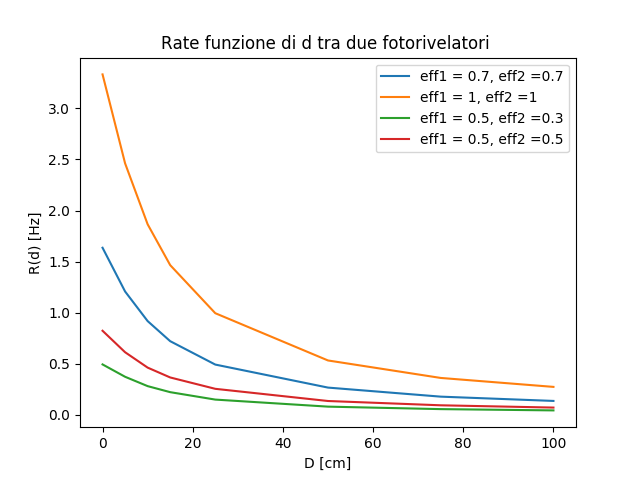

In [14]:
plt.figure(1)
plt.xlabel('D [cm]') 
plt.ylabel('R(d) [Hz]')
plt.title("Rate funzione di d tra due fotorivelatori ")
plt.plot(D, Rated1 , label= 'eff1 = 0.7, eff2 =0.7')
plt.plot(D, Rated2 , label= 'eff1 = 1, eff2 =1')
plt.plot(D, Rated3 , label= 'eff1 = 0.5, eff2 =0.3')
plt.plot(D, Rated4 , label= 'eff1 = 0.5, eff2 =0.5')
plt.legend()
plt.show()

Studiamo un ulteriore caso particolare, l'efficienza dei detector è la stessa, e fissato d, vediamo come varia R al variare dell'efficienza:

In [16]:
E= np.array([0, 0.05, 0.10, 0.15, 0.25, 0.50, 0.75, 1])

Ratef1 = np.array([rate(20, Ev, Ev) for Ev in E])
Ratef2 = np.array([rate(50, Ev, Ev) for Ev in E])
Ratef3 = np.array([rate(0, Ev, Ev) for Ev in E])

<IPython.core.display.Javascript object>


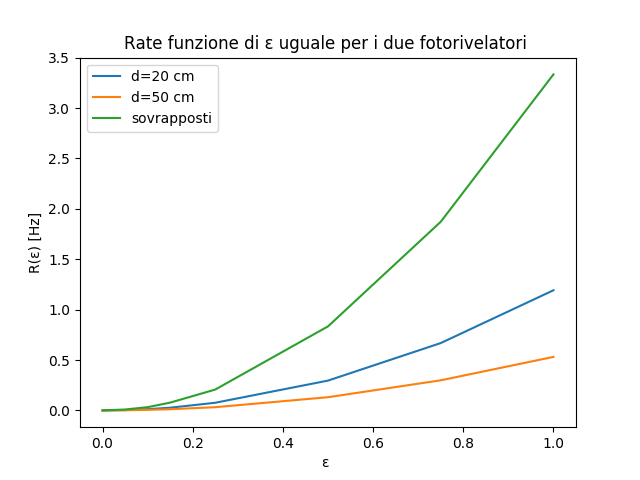

In [17]:
plt.figure(2)
plt.xlabel('ε ') 
plt.ylabel('R(ε) [Hz]')
plt.title("Rate funzione di ε uguale per i due fotorivelatori ")
plt.plot(E, Ratef1 , label= 'd=20 cm')
plt.plot(E, Ratef2 , label= 'd=50 cm')
plt.plot(E, Ratef3 , label= 'sovrapposti')
plt.legend()
plt.show()